# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [20]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [21]:
df_new = df[df['dt'] >= '1950-01-01']
df_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

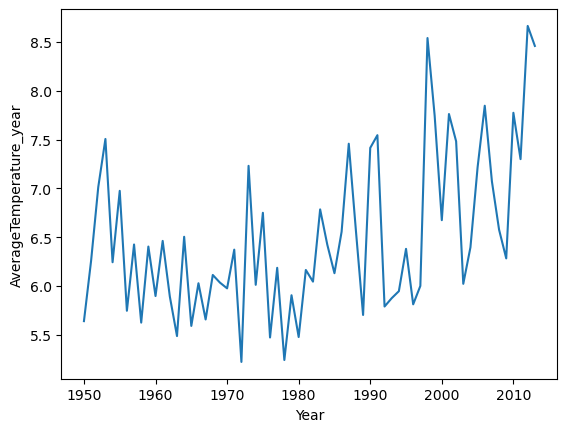

In [22]:
df_Toronto = df_new[df_new['City'] == 'Toronto']
Toronto_year = df_Toronto.groupby(df_new['dt'].dt.year).mean()
df_Toronto_year = Toronto_year.reset_index()
plt.plot(df_Toronto_year['dt'], df_Toronto_year['AverageTemperature'])
plt.xlabel('Year')
plt.ylabel('AverageTemperature_year')
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [23]:
city_var = df_new.groupby('City').var()
df_city_var = city_var.reset_index()
df_city_var.loc[df_city_var['AverageTemperature'].idxmax(), 'City']

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

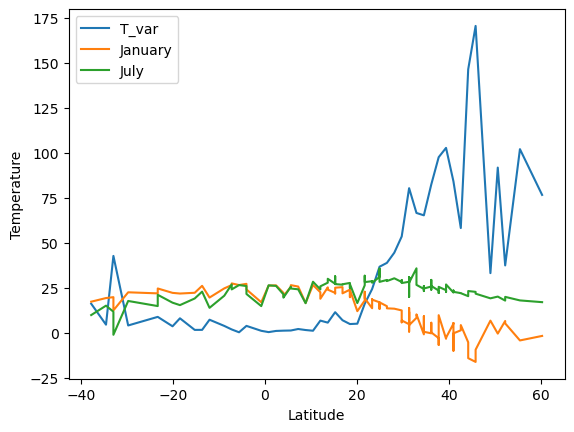

In [24]:
#1 дисперсия
Latitude_var = df_new.groupby('Latitude').var()
df_Latitude_var = Latitude_var.reset_index()
df_Latitude_var['Latitude'] = df_Latitude_var['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
df_Latitude_var_sort = df_Latitude_var.sort_values(by='Latitude')

#2 1975.01
Latitude_January = df_new[(df_new['dt'].dt.year == 1975) & (df_new['dt'].dt.month == 1)]
df_Latitude_January = Latitude_January.reset_index()
df_Latitude_January['Latitude'] = df_Latitude_January['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
df_Latitude_January_sort = df_Latitude_January.sort_values(by='Latitude')

#3 1975.07
Latitude_July = df_new[(df_new['dt'].dt.year == 1975) & (df_new['dt'].dt.month == 7)]
df_Latitude_July = Latitude_July.reset_index()
df_Latitude_July['Latitude'] = df_Latitude_July['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
df_Latitude_July_sort = df_Latitude_July.sort_values(by='Latitude')


plt.plot(df_Latitude_var_sort['Latitude'], df_Latitude_var_sort['AverageTemperature'],label='T_var')
plt.plot(df_Latitude_January_sort['Latitude'], df_Latitude_January_sort['AverageTemperature'],label='January')
plt.plot(df_Latitude_July_sort['Latitude'], df_Latitude_July_sort['AverageTemperature'],label='July')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

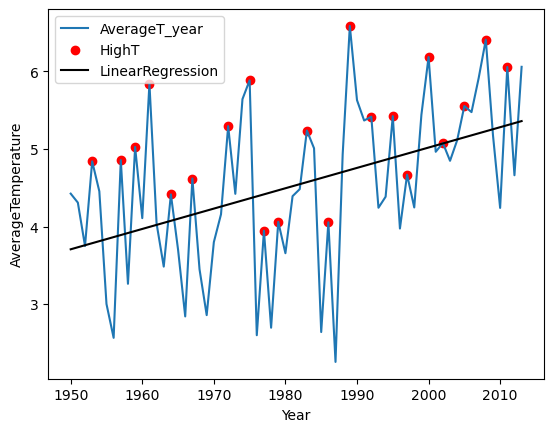

In [25]:
SPB = df_new[df_new['City'] == 'Saint Petersburg']
SPB_mean = SPB.groupby(SPB['dt'].dt.year).mean()
SPB_mean = SPB_mean.reset_index()
SPB_mean['Previous_Year'] = SPB_mean['AverageTemperature'].shift(1)
SPB_mean['Next_Year'] = SPB_mean['AverageTemperature'].shift(-1)

high = SPB_mean[(SPB_mean['AverageTemperature'] > SPB_mean['Previous_Year'])
                       & (SPB_mean['AverageTemperature'] > SPB_mean['Next_Year'])]

plt.plot(SPB_mean['dt'],SPB_mean['AverageTemperature'],label='AverageT_year')
plt.xlabel('Year')
plt.ylabel('AverageTemperature')
plt.scatter(high['dt'], high['AverageTemperature'],c='r',label='HighT')

from sklearn.linear_model import LinearRegression

x = SPB_mean['dt'].values.reshape(-1, 1)
y = SPB_mean['AverageTemperature'].values

model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x)
plt.plot(x, predictions, color='black',label='LinearRegression')

plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

## 3.6.1 
Город, у которого разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

In [26]:
df_city_year = df_new.groupby(['City', df_new['dt'].dt.year]).mean()
max_diff = df_city_year['AverageTemperature'].groupby(level=0).max() - df_city_year['AverageTemperature'].groupby(level=0).min()
max_diff.abs().idxmax()

'Mashhad'

## 3.6.2
Город, у которого самая большая средняя разница между средней температурой января и средней температурой июля.

In [27]:
df_city = df_new.groupby('City')
diff17 = df_city.apply(lambda x: x[x['dt'].dt.month == 1]['AverageTemperature'].mean() - x[x['dt'].dt.month == 7]['AverageTemperature'].mean())
diff17.abs().idxmax()

'Harbin'

## 3.6.3
Город, у которого наибольшее среднее количество месяцев с отрицательной температурой в году.

In [28]:
df_negative_T = df_new[df_new['AverageTemperature'] < 0].groupby('City')
df_negative_T_count = df_negative_T['AverageTemperature'].count()
df_negative_T_mean = df_negative_T_count.divide(12)
df_negative_T_mean.idxmax()

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

## 3.7.1  
Отобразите города на карте, например с помощью geopandas/folium или plotly. Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 

In [29]:
import geopandas as gpd
import folium
from folium import plugins

df_10 = df_new[df_new['dt'].dt.year > 2003] # за последние 10 лет
ave_T_1 = df_10[df_10['dt'].dt.month == 1].groupby('City')['AverageTemperature'].mean()
city_T = pd.DataFrame({'City': ave_T_1.index, 'Temperature': ave_T_1.values})
geodf = pd.merge(city_T, df_10[['City', 'Latitude', 'Longitude']], on='City').drop_duplicates()
geodf['Longitude'] = geodf['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))
geodf['Latitude'] = geodf['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
#print(geodf)

city_set = set()
city_dict = {}
map = folium.Map(location = [0,0], tiles = "OpenStreetMap", zoom_start = 2)
for ele in geodf['City'].tolist():
    city_set.add(ele)
for city in city_set:
    city_dict[city] = geodf[geodf['City'] == city]
for city in city_set:
    city_info = city_dict[city]
    longitude = city_info['Longitude'].iloc[0]
    latitude = city_info['Latitude'].iloc[0]
    temp = ave_T_1[city]
    temp_color = None
    if temp <= 0:
        temp_color = "blue"
    elif temp <= 10:
        temp_color = "orange"
    elif temp <= 20:
        temp_color = "red"
    else:
        temp_color = "purple"

    map.add_child(
        folium.Marker(
            location = [latitude, longitude],
            popup =
                "City:" + city + "<br>"
                + "AverageTemperature:" + str(round(temp, 1)) + "°C" + "<br>"
                + "Longitude:" + str(round(longitude, 4)) + "<br>"
                + "Latitude:" + str(round(latitude, 4)),
            icon = folium.Icon(color="%s" % temp_color),
        )
    )
map

## 3.7.2
Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании 3.5). Отобразите города цветом, который зависит от угла наклона этой прямой. 

In [30]:
aveT_city_year = df_new.groupby(['City', df_new['dt'].dt.year])['AverageTemperature'].mean()
df_aveT_city_year = aveT_city_year.reset_index()
city_slope = pd.DataFrame(columns=['City', 'Slope'])

for city in pd.unique(df_aveT_city_year['City']):
    city_df = df_aveT_city_year[df_aveT_city_year['City'] == city]
    line = LinearRegression()
    line.fit(city_df['dt'].values.reshape(-1, 1), city_df['AverageTemperature'])
    slope = line.coef_[0]
    city_slope = pd.concat([city_slope, pd.DataFrame({'City': [city], 'Slope': [slope]})], ignore_index=True).drop_duplicates()

gdf = pd.merge(city_slope, df[['City', 'Latitude', 'Longitude']], on='City').drop_duplicates()
gdf['Longitude'] = gdf['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))
gdf['Latitude'] = gdf['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
#print(gdf)

map = folium.Map(location = [0,0], tiles = "OpenStreetMap", zoom_start = 2)
for city, row in gdf.iterrows():
    slope = row['Slope']
    longitude = row['Longitude']
    latitude = row['Latitude']
    color = None
    if slope <= 0.01:
        color = "blue"
    elif slope <= 0.02:
        color = "orange"
    elif slope <= 0.03:
        color = "red" 
    else:
        color = "purple"
    map.add_child(
    folium.Marker(
        location=[latitude,longitude],
        popup=
            "City:" + row['City'] + "<br>"
            + "Slope:" + str(round(slope, 4)) + "<br>"
            + "Longitude:" + str(round(longitude, 4)) + "<br>"
            + "Latitude:" + str(round(latitude, 4)),
        icon=folium.Icon(color="%s" % color),
    )
)
map

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*